### SECTION.01 2차원 입력 데이터

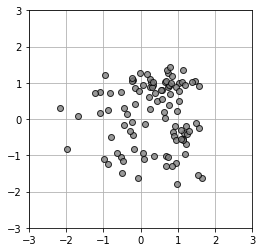

In [167]:
# -------------------- 리스트 9-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성 ---------------------------
np.random.seed(1)
N = 100
K = 3
T3 = np.zeros((N, 3), dtype=np.uint8) ## np.uint8 - 0 ~ 255 양수
X = np.zeros((N, 2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
X_col = ['cornflowerblue','black','white']
Mu = np.array([[-.5,-.5],[.5,1.0],[1,-.5]]) #분포의 중심
Sig = np.array([[.7,.7],[.8,.3],[.3,.8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # 누적확률 --> len(Pi) = K
for n in range(N): ## 0 ~ 99
    wk = np.random.rand() # 만들어진 난수 어레이는 주어진 값에 의해 결정되며, 0,1 범위에서 균일한 분포
    for k in range(K): ## 0 ~ 2
        if wk < Pi[k]:
            T3[n,k] = 1
            break
    for k in range(2): ## 0 ~ 1
        X[n,k] = (np.random.randn() * Sig[T3[n, :] == 1, k]
                  + Mu[T3[n, :] == 1, k])
#         print(Sig[T3[n, :] == 1, k])
#         T3[n, :] == 1 는 T3의 bull 함수 반환 __ 인덱싱을 하면 true인 곳을 숫자로 반환
#         X[n,k] = (np.random.randn() * Sig[0, k])
#         print(Sig[T3[n, :] == 1, k] + Mu[T3[n, :] == 1, k])
#         print(np.ndarray(X[n,k]))
#         print(Mu[T3[n, :] == 1, k])

# 데이터를 그리기 -----------------------------------------
def show_data(x):
    plt.plot(x[:,0],x[:,1], linestyle='none', # 선모양
            marker = 'o' , markersize = 6, #마커모양, 마커사이즈
            markeredgecolor = 'black', color = 'gray', alpha =0.8) # 마커테두리, 마커색, 마커투명도
    plt.grid(True) # 격자 표시 ON
# T3
# X
# show_data(X)

# 메인 ------------------------------------------------
plt.figure(1, figsize=(4,4)) ## 차트의 크기 설정
show_data(X) ## 함수에 데이터 집어넣기
plt.xlim(X_range0) ## X축 범위 설정
plt.ylim(X_range1) ## X축 범위 설정
plt.show() ## 차트 띄우는 명령
np.savez('data_ch9.npz', X=X , X_range0 = X_range0, ##여러개의 배열을 1개의 압축되지 않은 *.npz 포맷 파일로 저장하기
        X_range1 = X_range1) # 매개변수도 저장해주기
# a = np.load('C:/apps/RNN&reinforcement_learning/data_ch9.npz')
# print(a)

In [143]:
# for n in range(N):
#     wk = np.random.rand()
#     for k in range(K):
#         if wk < Pi[k]:
#             T3[n,k] = 1
#             print(f'Pi[{K}] : {Pi[k]}, T3[{n},{k}] : {T3[n,k]}')
#             break
#     for k in range(2):
#         X[n,k] = (np.random.randn() * Sig[T3[n, : ]== 1, k] + Mu[T3[n,:]== 1, k])
#         print(f'np.random.randn() : {np.random.randn()} \n, Sig[T3{n,:},{k}] : \n{Sig[T3[n,:]]} \n, Mu[T3]{n,:},{k} : {Mu[T3[n,:]],k}')
#         print(f'X[{n},{k}] : {X[n,k]}\n')

In [144]:
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# np.random.seed(1)
# N = 100
# K = 3
# T3 = np.zeros((N, 3), dtype = np.uint8)
# print(T3.shape)
# X = np.zeros((N, 2))
# print(X.shape)
# print()
# X_range0 = [-3, 3]
# X_range1 = [-3, 3]
# X_col = ['cornflowerblue' ,'black' , 'white']
# Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심 #클러스터 중심
# Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산 # 클러스터 분산
# Pi = np.array([0.4 , 0.8, 1])
# for n in range(N):
#     wk = np.random.rand()
#     for k in range(K):# 0,1,2
#         if wk < Pi[k]: # 데이터에 해당하는 랜덤난수가 pi보다 작으면 1
#             T3[n, k] = 1
#             print()
#             print("n:{}, cluster:{}".format(n,k))
#             break
#     print("T3:",T3[n,])
#     for k in range(2): # 0,1
#         X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k] # t3값 1에 해당하는 index 그 index값의 0,1값
#                    + Mu[T3[n, :] == 1, k])
#         print("rand:{} * Sig:{} + Mu:{}".format((X[n, k] - Mu[T3[n, :] == 1, k]) / Sig[T3[n, :] == 1, k],
#                                                 Sig[T3[n, :] == 1, k],
#                                                 Mu[T3[n, :] == 1, k]))
#         print("X[{},{}]".format(n,k),X[n, k])

### SECTION.02 K-means 기법

In [ ]:
# -------------------- 리스트 9-1-(3)
# 데이터 그리는 함수
def show_prm(x, r, mu, col):
    for k in range(K):
        # 데이터 분포 묘사하기

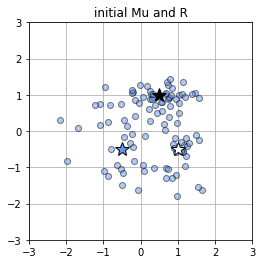

In [136]:
# -------------------- 리스트 9-1-(3)
# 데이터 그리는 함수
def show_prm(x, r, mu, col):
    for k in range(K):
        # 데이터 분포 묘사하기
        plt.plot(x[r[:, k] == 1, 0], x[r[:, k] == 1, 1],
                marker = 'o', markerfacecolor = X_col[k], markeredgecolor='k',
                markersize = 6, alpha = 0.5, linestyle = 'none')
        # 데이터의 평균을 '별표'로 묘사하기
        plt.plot(mu[k, 0], mu[k, 1], marker = '*',
                markerfacecolor = X_col[k], markersize = 15,
                markeredgecolor = 'k', markeredgewidth = 1)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.grid(True)
plt.figure(figsize=(4,4))
R = np.c_[np.ones((N,1)), np.zeros((N, 2))]
show_prm(X, R, Mu, X_col)
plt.title('initial Mu and R')
plt.show()